In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
image_paths=[]
labels=[]
datapath="/kaggle/input/rsna-bcd-1024x512-preprocessed/train_images"
df=pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")
df


     
       
        

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


*print(match["cancer"].values[0])*

**1-match["cancer"]:**

This selects the cancer column from the DataFrame match.

It returns a Series (a column) from the DataFrame that contains all the values for that column.

**2-.values:**

.values converts the Series into a numpy array. So, match["cancer"].values returns a 1D array containing the values in the cancer column.

**3-[0]:**

Since .values returns a numpy array, [0] selects the first element in that array.

In case the filter df[df["image_id"] == id_part] returns only one row (which is typically the case when image_id is unique), the first element will be the cancer value for that row.

In [35]:

image="1864590858.png"
id_part, _ = os.path.splitext(image)#splittext return id in string formate 
df['image_id'] = df['image_id'].astype(str)#so we conver image id in dataframe into string formate to make match correctly
print(id_part)
match = df[df["image_id"] == id_part]#return row that has this image id 
print(match)


print(match["cancer"].values[0])



1864590858
   site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
2        2       10006  1864590858          R  MLO  61.0       0       0   

   invasive  BIRADS  implant density  machine_id  difficult_negative_case  
2         0     NaN        0     NaN          29                    False  
0


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [36]:
folds=os.listdir(datapath)#ids folders for patients
for fold in folds:
    folder_path=os.path.join(datapath,fold)#folder path for id patient
    images=os.listdir( folder_path)#images for acertain patient
    for image in images:
        image_path=os.path.join(folder_path,image)
        
        image_paths.append(image_path)
        id_part,_=os.path.splitext(image)
        match = df[df["image_id"] == id_part]
        if not match.empty:
           labels.append(match["cancer"].values[0])
       

In [37]:
df_new=pd.DataFrame({"filepaths":image_paths,"labels":labels})
df_new

,filepaths,labels
0,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0
1,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0
2,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0
3,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0
4,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0
...,...,...
54701,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0
54702,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0
54703,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0
54704,/kaggle/input/rsna-bcd-1024x512-preprocessed/t...,0


In [45]:
df_new["labels"]=df_new['labels'].astype(str)

In [46]:
train_df,dummy_df=train_test_split(df_new,random_state=42,test_size=0.2)
test_df,valid_df=train_test_split(dummy_df,random_state=42,test_size=0.5)


In [56]:
gen=ImageDataGenerator()
train_gen=gen.flow_from_dataframe(train_df,x_col="filepaths",y_col="labels",color_mode="rgb",batch_size=128,class_mode="binary",target_size=(224,224))
test_gen=gen.flow_from_dataframe(test_df,x_col="filepaths",y_col="labels",color_mode="rgb",batch_size=32,class_mode="binary",target_size=(224,224))
valid_gen=gen.flow_from_dataframe(valid_df,x_col="filepaths",y_col="labels",color_mode="rgb",batch_size=32,class_mode="binary",target_size=(224,224))

Found 43764 validated image filenames belonging to 2 classes.
Found 5471 validated image filenames belonging to 2 classes.
Found 5471 validated image filenames belonging to 2 classes.


when you write class_mode="binary" then you must make y coloumn that is labels to be string

In [61]:
basemodel=tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling="max"
           
)
basemodel.trainable=True
model=Sequential([
    basemodel,
    Dense(128,activation="relu"),
    Dense(1,activation="sigmoid"),
    
])
model.compile(optimizer=Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=["accuracy"])
model.summary



<bound method Model.summary of <Sequential name=sequential_6, built=True>>

In [62]:
model.fit(train_gen,validation_data=valid_gen,epochs=1,batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
E0000 00:00:1746142276.368723     153 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746142276.575558     153 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 66/342 ━━━━━━━━━━━━━━━━━━━━ 6:51 1s/step - accuracy: 0.9583 - loss: 1.3296

E0000 00:00:1746142399.357472     155 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746142399.562485     155 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


342/342 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - accuracy: 0.9720 - loss: 0.7370 - val_accuracy: 0.9797 - val_loss: 1.8717


In [63]:
model.save('model.keras')

In [64]:
model.evaluate(test_gen)

171/171 ━━━━━━━━━━━━━━━━━━━━ 73s 428ms/step - accuracy: 0.9795 - loss: 1.8889


[1.7705286741256714, 0.980807900428772]

In [76]:
from tensorflow.keras.models import load_model
loaded_model=load_model("model.keras")


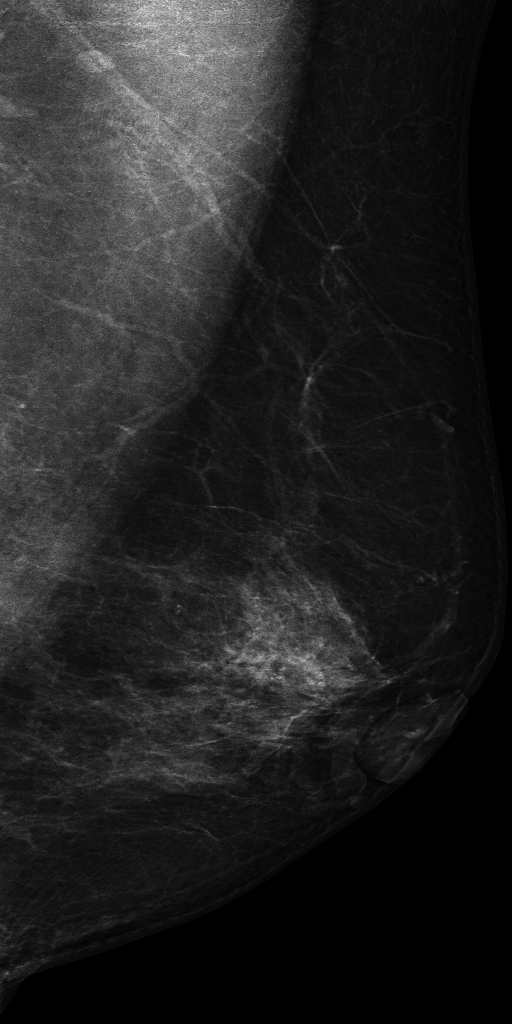

In [73]:
from PIL import Image
Image_path="/kaggle/input/rsna-bcd-1024x512-preprocessed/train_images/10006/1864590858.png"
image=Image.open(Image_path)#read image and can show it direct without show as plt or cv2
image

In [84]:
image="1864590858.png"
id_part, _ = os.path.splitext(image)#splittext return id in string formate 
df['image_id'] = df['image_id'].astype(str)#so we conver image id in dataframe into string formate to make match correctly
match = df[df["image_id"] == id_part]#return row that has this image id 
print(match["cancer"].values[0])


0


In [83]:
from PIL import Image
import tensorflow as tf

# Convert the image to RGB
img = image.convert('RGB')

# Resize the image
img = img.resize((224, 224))

# Convert image to array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add a batch dimension (1, 224, 224, 3)
img_array = tf.expand_dims(img_array, 0)

# Predict
prediction = loaded_model.predict(img_array)

print(prediction[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0.]
